In [1]:
from __future__ import division
import sys
import os
import numpy as np
import pandas as pd
import datetime
from math import ceil, sqrt, floor
from scipy import signal, stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from dataset import Dataset
from database import Database
from sample import Sample
from h5_sample import H5Sample

2013-06-25UT16:51:13.10691922.marion.vr2


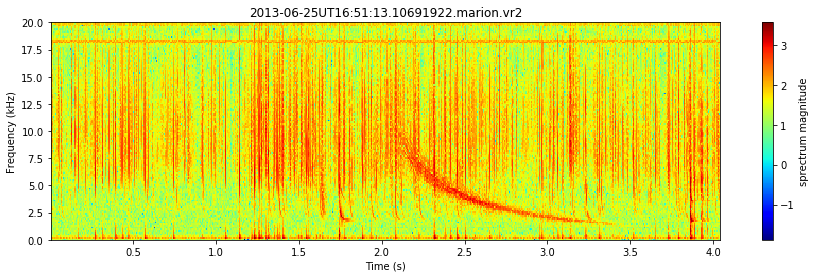

In [38]:
dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
# site = 'sanae'
my_database = Database(dataset_loc, database_loc, site)
my_dataset = Dataset(dataset_loc, site, ext='.vr2')
# my_dataset.get_random_sample()
my_sample = Sample(dataset_loc, site, my_dataset.get_random_sample())
# my_sample = Sample(dataset_loc, site, '2013-05-27UT00:59:39.62002156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-05-20UT20:15:09.24222156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-25UT15:06:06.85411922.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-26UT02:35:55.34691914.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-04UT19:09:19.11011930.marion.vr2')
my_sample = Sample(dataset_loc, site, '2013-06-25UT16:51:13.10691922.marion.vr2')


size=(15,4)
cmap='jet'
axis=True
print(my_sample.get_file()) 
my_sample.spectrogram_plot(figsize=size, xaxis=axis, yaxis=axis, xlabel='Time (s)', ylabel='Frequency (kHz)', zlabel='sprectrum magnitude', 
                           title=my_sample.get_file(), cmap=cmap, cmap_show=True)

### Histogram of duration of data at each site

marion: mean(4), std(1)


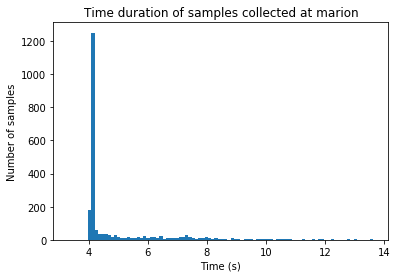

sanae: mean(5), std(1)


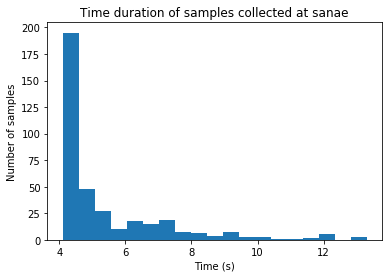

In [3]:
dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
sites = ['marion', 'sanae']
for site in sites:
    my_dataset = Dataset(dataset_loc, site, ext='.vr2')
    data_time_length = []
    for sample in my_dataset.get_samples():
        sample_obj = Sample(dataset_loc, site, sample)
        data, fs = sample_obj.vr2_to_panda()
        start =  'UT'.join(str(data['X'].index[0]).split(' '))
        end = 'UT'.join(str(data['X'].index[-1]).split(' ')) 
        data_time_length.append(sample_obj._datetime_diff(end, start))
    data_time_length = np.asarray(data_time_length)
    print('%s: mean(%d), std(%d)'%(site, data_time_length.mean(), data_time_length.std()))
    plt.figure()
    plt.title('Time duration of samples collected at %s'%site)
    plt.xlabel('Time (s)')
    plt.ylabel('Number of samples')
    plt.hist(data_time_length, bins='auto')
    plt.show()